In [53]:
import cv2
print('OpenCV imported')

OpenCV imported


In [54]:
video_path = '../data/video_sample.mp4'
cap = cv2.VideoCapture(video_path)

if cap.isOpened():
    fps = cap.get(cv2.CAP_PROP_FPS)
    print(F'Video FPS: {fps}')
else:
    print("Cannot open video")

cap.release()

Video FPS: 23.976024627685547


In [55]:
def analyse_video_properties(video_path):
    cap = cv2.VideoCapture(video_path)
    fps = cap.get(cv2.CAP_PROP_FPS)
    total_frames = cap.get(cv2.CAP_PROP_FRAME_COUNT)
    width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)   # Your guess!
    height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)

    duration_seconds = total_frames / fps
    duration_minutes = duration_seconds / 60

    properties = {
        'fps': fps,
        'total_frames': total_frames,
        'width': width,
        'height': height,
        'duration_seconds': duration_seconds,
        'duration_minutes': duration_minutes
    }

    cap.release()
    return properties

In [56]:
video_info = analyse_video_properties('../data/video_sample.mp4')
print(video_info)

{'fps': 23.976024627685547, 'total_frames': 238.0, 'width': 1280.0, 'height': 720.0, 'duration_seconds': 9.926583063531604, 'duration_minutes': 0.16544305105886006}


In [57]:
def analyse_frame_colors(frame):

    blue_values = frame[:, :, 0]
    green_values = frame[:, :, 1]
    red_values = frame[:, :, 2]

    average_red = int(round(red_values.mean()))
    average_blue = int(round(blue_values.mean()))
    average_green = int(round(green_values.mean()))

    color_averages={
        'blue': average_blue,
        'green': average_green,
        'red': average_red
    }
    return color_averages

In [58]:
cap = cv2.VideoCapture('../data/video_sample.mp4')
success, frame = cap.read()

colors = analyse_frame_colors(frame)
print(colors)

cap.release()

{'blue': 42, 'green': 45, 'red': 46}


In [59]:


cap = cv2.VideoCapture('../data/video_sample.mp4')

cap.set(cv2.CAP_PROP_POS_MSEC, 0)
success, frame_start = cap.read()
colors_start = analyse_frame_colors(frame_start)

cap.set(cv2.CAP_PROP_POS_MSEC, 5000)
success, frame_middle = cap.read()
colors_middle = analyse_frame_colors(frame_middle)

print("start colors:", colors_start)
print("middle colors", colors_middle)

cap.release()

start colors: {'blue': 42, 'green': 45, 'red': 46}
middle colors {'blue': 35, 'green': 48, 'red': 57}


In [60]:
cap = cv2.VideoCapture('../data/video_sample.mp4')

cap.set(cv2.CAP_PROP_POS_FRAMES, 228)
success, frame = cap.read()

if success:
    print("got it!")
    print(f'Frame shape: {frame.shape}')
else:
    print("Failed")

cap.release()

got it!
Frame shape: (720, 1280, 3)


In [61]:
cap = cv2.VideoCapture('../data/video_sample.mp4')

total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print(f'Total frames: {total_frames}')
print(f'Valid frame numbers: 0 to {total_frames - 1}')

cap.set(cv2.CAP_PROP_POS_FRAMES, total_frames - 1)
success, frame = cap.read()
print(f'Last frame success: {success}')

cap.release()

Total frames: 238
Valid frame numbers: 0 to 237
Last frame success: False


In [62]:
for frame_num in [229, 230, 231]:
    cap.set(cv2.CAP_PROP_POS_FRAMES, frame_num)
    success, frame = cap.read()
    print(f'Frame {frame_num} - Success: {success}')

Frame 229 - Success: False
Frame 230 - Success: False
Frame 231 - Success: False


In [63]:
cap = cv2.VideoCapture('../data/video_sample.mp4')

last_good_frame = 0 
for frame_num in range(238):
    cap.set(cv2.CAP_PROP_POS_FRAMES, frame_num)
    success, frame = cap.read()

    if success:
        last_good_frame = frame_num
    else: 
        print(f'First failed frame: {frame_num}')
        break

print(f'Actually usable frames: 0 to {last_good_frame}')
print(f"That's {last_good_frame + 1} real frames")

cap.release()

First failed frame: 229
Actually usable frames: 0 to 228
That's 229 real frames


In [64]:
cap = cv2.VideoCapture('../data/video_sample.mp4')

frame_numbers = [0, 114, 228]
frames = []

for frame_num in frame_numbers:
    cap.set(cv2.CAP_PROP_POS_FRAMES, frame_num)
    success, frame = cap.read()
    if success:
        frames.append(frame)
    else:
        print(f'Frame {frame_num} failed, skipping...')
        continue

cap.release()
print(f'Extracted {len(frames)} frames')

Extracted 3 frames


In [65]:
def extract_frames_by_step(video_path, step_size):
    
    cap = cv2.VideoCapture(video_path)
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    frames = []

    for frame_num in range(0, total_frames-1, step_size):
        cap.set(cv2.CAP_PROP_POS_FRAMES, frame_num)
        success, frame = cap.read()
        if success:
            frames.append(frame)
        else:
            print(f'Frame {frame_num} failed, skipping...')
            continue

    cap.release()
    print(f'Extracted {len(frames)} frames')
    return frames

In [66]:
#testing

video_path = '../data/video_sample.mp4'
my_frames = extract_frames_by_step(video_path, 20)
print(f'Got {len(my_frames)} frames')

Extracted 12 frames
Got 12 frames


In [67]:
def extract_specific_frames(video_path, frame_list):
    cap = cv2.VideoCapture(video_path)
    frames = []

    for frame_num in frame_list:
        cap.set(cv2.CAP_PROP_POS_FRAMES, frame_num)
        success, frame = cap.read()
        if success:
            frames.append(frame)
        else:
            print(f"Frame {frame_num} failed. Skipping..")
            continue
    
    cap.release()
    return frames

In [68]:
#test

my_frames = extract_specific_frames('../data/video_sample.mp4', [0,50,100,150])
print(f'Got {len(my_frames)} specific frames')

Got 4 specific frames


In [70]:
def analyse_video_color_timeline(video_path, num_samples=5):

    props = analyse_video_properties(video_path)
    total_frames = props['total_frames']
    step_size = int(total_frames // num_samples)

    frames = extract_frames_by_step(video_path, step_size)

    timeline = []
    for frame in frames:
        colors = analyse_frame_colors(frame)
        timeline.append(colors)
    return timeline


In [77]:
video_path = '../data/video_sample.mp4'

video_samples = analyse_video_color_timeline(video_path, 10)
print(video_samples)

Frame 230 failed, skipping...
Extracted 10 frames
[{'blue': 42, 'green': 45, 'red': 46}, {'blue': 40, 'green': 33, 'red': 26}, {'blue': 53, 'green': 87, 'red': 110}, {'blue': 48, 'green': 71, 'red': 79}, {'blue': 37, 'green': 50, 'red': 58}, {'blue': 35, 'green': 48, 'red': 57}, {'blue': 51, 'green': 71, 'red': 93}, {'blue': 96, 'green': 96, 'red': 98}, {'blue': 36, 'green': 39, 'red': 73}, {'blue': 23, 'green': 25, 'red': 27}]


In [84]:
def visualize_frames(frames, title="Video Frames"):
    import matplotlib.pyplot as plt
    num_frames = len(frames)

    cols = min(3, num_frames)
    rows = (num_frames + cols -1) // cols

    fig, axes = plt.subplots(rows, cols, figsize=(15, 5* rows))

    for idx, frame in enumerate(frames):
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        if rows == 1:
            ax = axes[idx] if cols > 1 else axes
        else:
            ax = axes[idx // cols, idx % cols]
        
        ax.imshow(frame_rgb)
        ax.set_title(f"Frame {idx}")
        ax.axis('off')
    plt.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.show()

Extracted 6 frames


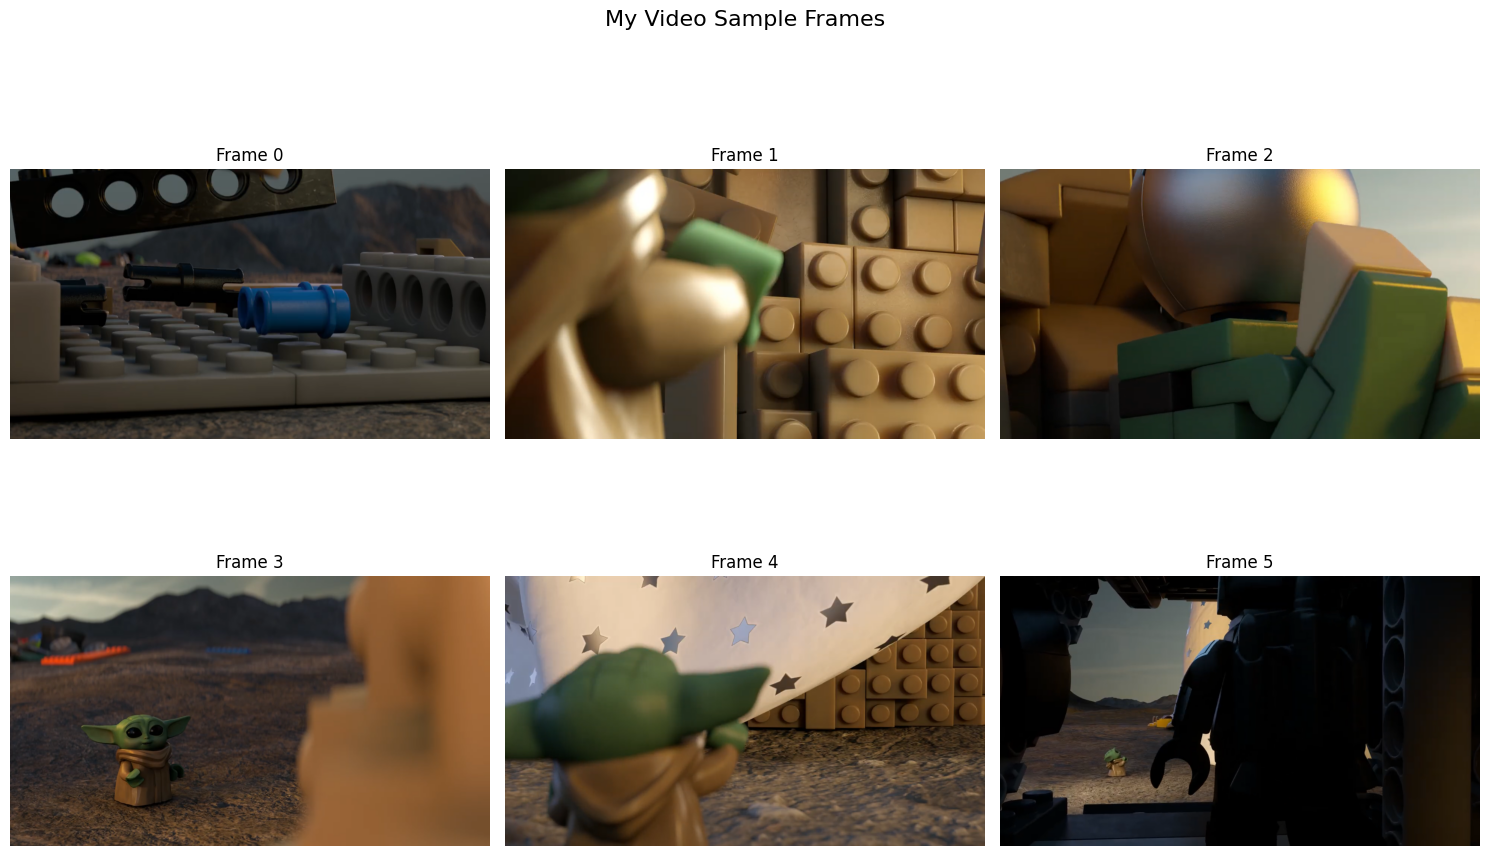

In [88]:
frames = extract_frames_by_step('../data/video_sample.mp4', 40)
visualize_frames(frames, "My Video Sample Frames")

In [89]:
def create_frame_analysis_dataframe(video_path, step_size):
    import pandas as pd

    props = analyse_video_properties(video_path)
    fps = props['fps']
    frames = extract_frames_by_step(video_path, step_size)

    analysis_data = []

    for frame_index, frame in enumerate(frames):
        frame_number = frame_index * step_size
        timestamp = frame_number / fps

        colors = analyse_frame_colors(frame)

        row_data = {
            "frame_index" : frame_index,
            "frame_number" : frame_number,
            "timestamp" : timestamp,
            'red': colors['red'],
            'green': colors['green'],
            'blue' : colors['blue']
        }
        analysis_data.append(row_data)

    df = pd.DataFrame(analysis_data)
    return df

In [92]:
df = create_frame_analysis_dataframe('../data/video_sample.mp4', 50)
print(df)

Extracted 5 frames
   frame_index  frame_number  timestamp  red  green  blue
0            0             0   0.000000   46     45    42
1            1            50   2.085417  111     89    57
2            2           100   4.170833   57     49    36
3            3           150   6.256250   96     80    56
4            4           200   8.341666   26     24    22


In [95]:
print(df[['timestamp', 'red', 'green', 'blue']])

   timestamp  red  green  blue
0   0.000000   46     45    42
1   2.085417  111     89    57
2   4.170833   57     49    36
3   6.256250   96     80    56
4   8.341666   26     24    22


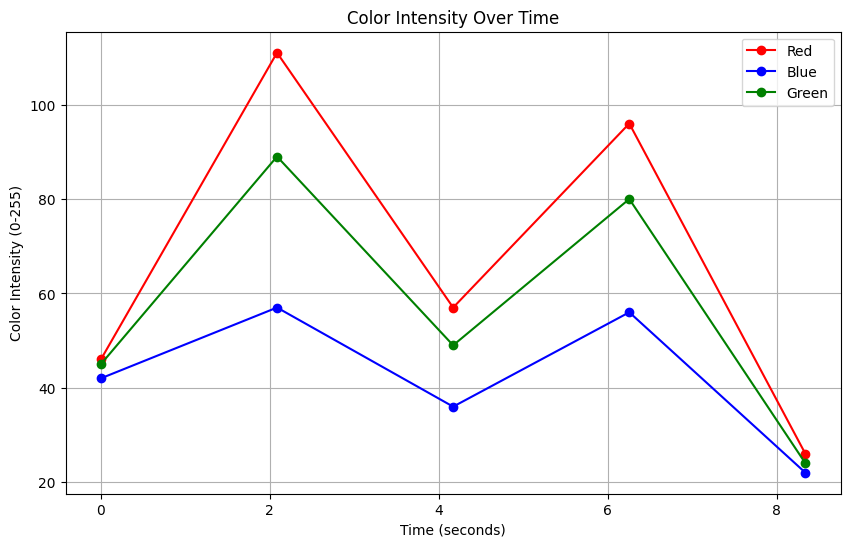

In [100]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(df['timestamp'], df['red'], 'o-', color='red', label='Red')
plt.plot(df['timestamp'], df['blue'], 'o-', color='blue', label='Blue')
plt.plot(df['timestamp'], df['green'], 'o-', color='green', label='Green')
plt.xlabel('Time (seconds)')
plt.ylabel('Color Intensity (0-255)')
plt.title('Color Intensity Over Time')
plt.legend()
plt.grid(True)
plt.show()